# Table of content
* [Loading ICA data](#first-bullet)
* [iModulons](#second-bullet)
* [Figure 2](#third-bullet)
*

In [93]:
import pymodulon
from os import path
import pandas as pd
import re
from Bio.KEGG import REST
from tqdm.notebook import tqdm

from pymodulon.core import IcaData
from pymodulon.plotting import *
from pymodulon.util import *
from os.path import abspath, join
from pymodulon.io import *
from pymodulon.compare import *

In [94]:
# plt.style.use('/home/tahani/.config/matplotlib/figures.mplstyle')

In [95]:
pymodulon.__path__

['/home/tahani/pymodulon/src/pymodulon']

In [96]:
# Enter the location of your data here
data_dir = '/home/tahani/Documents/elongatus/data/1_iModulon/'

## Metadata

In [97]:
Sample_table_prime = pd.read_csv(join(data_dir,'sample_table_prime.csv'), index_col = 0)
Sample_table_prime[['project','condition']]

,project,condition
current,,
SRX063252,RNAseq,wt
SRX063253,RNAseq,wt
SRX063254,RNAseq,wt
SRX2356912,rpaA,WT_1dusk_000
SRX2356913,rpaA,WT_2dark_005
...,...,...
SRX7119038,DHAR,wt_normal
SRX7119039,DHAR,wt_stressed
SRX7119040,DHAR,mut_normal


In [98]:
print(Sample_table_prime.project.notnull().all())
print(Sample_table_prime.condition.notnull().all())

False
False


## TRN

In [99]:
df_trn = pd.read_csv(path.join(data_dir,'TRN.csv'),sep=',')
df_trn.head()
None

In [100]:
print(df_trn.regulator.notnull().all())
print(df_trn.gene_id.notnull().all())

True
True


In [101]:
ica_data = IcaData(M = join(data_dir,'M_0.8_changed.csv'),
                   A = join(data_dir,'A_0.8_changed.csv'),
                   X = join(data_dir,'3_log_tpm_normalized_ICA.csv'),
                   gene_table = join(data_dir,'gene_info_operon.csv'),
                   sample_table = join(data_dir,'3_metadata_qc_ICA.csv'),
                   imodulon_table = join(data_dir,'imodulon_table_0.8.csv'),
                   trn = join(data_dir,'TRN.csv'),
                   threshold_method = 'kmeans')

## Loading ICA data <a class="anchor" id="first-bullet"></a>


In [102]:
X_prime = pd.read_csv(join(data_dir,'0_log_tpm.csv'), index_col = 0)
X_prime_normalized = pd.read_csv(join(data_dir,'X_prime_normalized.csv'), index_col = 0)

In [103]:
# M_1 = pd.DataFrame(np.linalg.pinv(ica_data.M.values), ica_data.M.columns, ica_data.M.index)

In [104]:
# print(X_prime.shape)
# M_1.shape

In [105]:
# # Multiply two DataFrames

# A_prime = M_1.dot(X_prime)
# A_prime

In [106]:
A_prime = infer_activities(ica_data,X_prime_normalized)

/home/tahani/pymodulon/src/pymodulon/util.py:324: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  shared_genes = ica_data.M.index & data.index


In [107]:
ica_data_prime = IcaData(M = join(data_dir,'M_0.8_changed.csv'),
                   A = A_prime,
                   X = X_prime_normalized,
                   gene_table = join(data_dir,'gene_info_operon.csv'),
                   sample_table = join(data_dir,'sample_table_prime.csv'),
                   imodulon_table = join(data_dir,'imodulon_table_0.8.csv'),
                   trn = join(data_dir,'TRN.csv'),
                   threshold_method = 'kmeans')

In [108]:
print("X", ica_data_prime.X.shape)
print("A", ica_data_prime.A.shape)
print("M", ica_data_prime.M.shape)
print("metadata", ica_data_prime.sample_table.shape)

X (2700, 317)
A (51, 317)
M (2700, 51)
metadata (317, 62)


## iModulons <a class="anchor" id="second-bullet"></a>

In [109]:
iMname = dict(zip(ica_data_prime.imodulon_table.index, ica_data_prime.imodulon_table['name']))
for i in range(len(ica_data_prime.imodulon_table.index)):
    ica_data_prime.rename_imodulons({i: iMname[i]})

In [110]:
ica_data_prime.imodulon_names

['SphR',
 'IdiB',
 'RpaB',
 'SG_1',
 'CmpR',
 'PhoSig',
 'Phage_related',
 'CysR',
 'CatTnprt',
 'Translation',
 'Biofilm',
 'NtcA-1',
 'RpaA/RpaB',
 'cellDiv',
 'NatComp',
 'SG_2',
 'STR',
 'SG_3',
 'HSR',
 'NatComp-related',
 'U_1',
 'Carboxysome',
 'U_2',
 'PS',
 'U_3',
 'NatComp-related2 ',
 'OxiTol',
 'U_4',
 'U_5',
 'U_6',
 'Cytc',
 'SG_4',
 'ciTransport',
 'SG_5',
 'Fur',
 'NtcA-2',
 'U_7',
 'SG_6',
 'SG_7',
 'U_8',
 'U_9',
 'U_10',
 'U_11',
 'U_12',
 'SG_8',
 'U_13',
 'U_14',
 'NtcA-3',
 'NtcA-4',
 'U_15',
 'U_16']

In [72]:
ica_data_prime.change_threshold('Fur',0.08)

In [168]:
iModulon = ica_data_prime.view_imodulon('NatComp-related2 ')
print(len(iModulon))
iModulon

18


,gene_weight,old_locus_tag,marie_annot,marie_gene_name,marie_product,gene_name,cycbio_gene_product,old_gene_name,old_gene_product,COG,uniprot,operon,accession,start,stop,strand,regulator
HKK26_RS00240,0.196329,anL59,HKK26_RS00240,HKK26_RS00240,HKK26_RS00240,HKK26_RS00240,HKK26_RS00240,HKK26_RS00240,HEAT repeat domain-containing protein,No COG annotation,UPI00005E2663,Op1991,NC_004073.2,45309,45860,-,NaN
SYNPCC7942_RS00340,0.147178,Synpcc7942_0069,SE_71,SE_71,hypothetical protein,SYNPCC7942_0069,hypothetical protein,SYNPCC7942_RS00340,hypothetical protein,No COG annotation,Q31S68,Op46,NC_007604.1,69079,69375,+,NaN
SYNPCC7942_RS00510,0.119377,Synpcc7942_0100,SE_105,SE_105,hypothetical protein,SYNPCC7942_0100,conserved hypothetical protein,SYNPCC7942_RS00510,hypothetical protein,No COG annotation,Q31S37,Op70,NC_007604.1,100528,101082,-,NaN
SYNPCC7942_RS01590,0.117386,Synpcc7942_0312,SE_323,SE_323,putative endonuclease,SYNPCC7942_0312,Protein of unknown function UPF0102,SYNPCC7942_RS01590,YraN family protein,"Replication, recombination and repair",Q31RH5,Op215,NC_007604.1,311280,311708,-,NaN
SYNPCC7942_RS02535,0.164439,Synpcc7942_0499,SYNPCC7942_RS02535,SYNPCC7942_RS02535,SYNPCC7942_RS02535,SYNPCC7942_0499,conserved hypothetical protein,SYNPCC7942_RS02535,hydroxyneurosporene-O-methyltransferase,"Secondary metabolites biosynthesis, transport,...",Q31QY8,Op360,NC_007604.1,487375,488370,-,NaN
SYNPCC7942_RS02920,0.136336,Synpcc7942_0573,SE_591,SE_591,hypothetical protein,SYNPCC7942_0573,hypothetical protein,SYNPCC7942_RS02920,hypothetical protein,No COG annotation,Q31QR4,Op408,NC_007604.1,555297,555533,-,NaN
SYNPCC7942_RS03605,0.195468,Synpcc7942_0703,SE_730,smf,DNA processing protein,dprA,"DNA processing protein DprA, putative",dprA,DNA-protecting protein DprA,"Replication, recombination and repair",UPI000046003B,Op509,NC_007604.1,694072,695280,+,NaN
SYNPCC7942_RS03610,0.128544,Synpcc7942_0704,SE_731,act,Vat family streptogramin A O-acetyltransferase,cat,Chloramphenicol O-acetyltransferase,vat,Vat family streptogramin A O-acetyltransferase,Function unknown,A0A0H3K1Z5,Op509,NC_007604.1,695313,695948,+,NaN
SYNPCC7942_RS03615,0.098027,Synpcc7942_0705,SE_732,SE_732,Transglutaminase-like superfamily protein,SYNPCC7942_0705,conserved hypothetical protein,SYNPCC7942_RS03615,transglutaminase family protein,Amino acid transport and metabolism,A0A0H3K4H5,Op509,NC_007604.1,695935,696570,+,NaN
SYNPCC7942_RS04330,0.116791,Synpcc7942_0837,SE_871,sll0786,GNAT family N-acetyltransferase,sll0786,GNAT family N-acetyltransferase,SYNPCC7942_RS04330,GNAT family N-acetyltransferase,Transcription,UPI000039FF76,Op615,NC_007604.1,832179,832811,-,NaN


In [171]:
ica_data_prime.change_threshold('NatComp-related2 ',0.07)

<AxesSubplot:xlabel='Gene Start', ylabel='NatComp-related2  Gene Weight'>

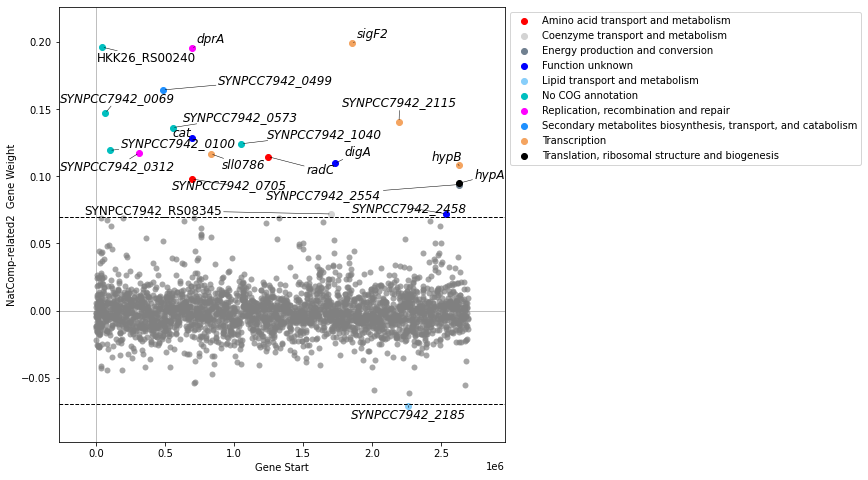

In [172]:
fig, ax = plt.subplots(figsize=(8,8))
#legend_kwargs = {'bbox_to_anchor': (1, 1)}

plot_gene_weights(ica_data_prime,'NatComp-related2 ', by='start',ax=ax,show_labels=True)

In [159]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig3/NC-1.pdf', dpi=300, bbox_inches="tight")

<AxesSubplot:ylabel='Biofilm iModulon\nActivity'>

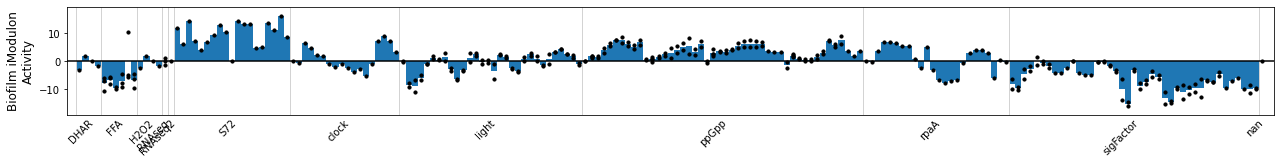

In [163]:
plot_activities(ica_data_prime,'Biofilm')

<AxesSubplot:ylabel='Fur iModulon\nActivity'>

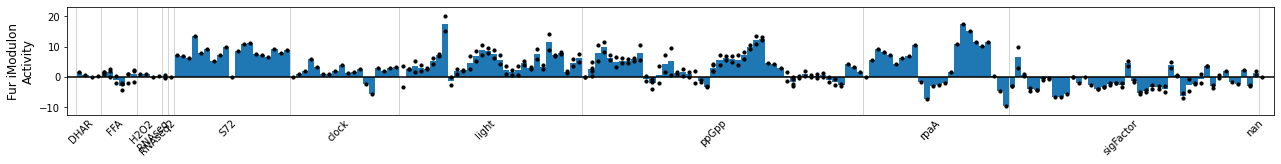

In [87]:
plot_activities(ica_data_prime,'Fur')

<AxesSubplot:ylabel='Biofilm iModulon\nActivity'>

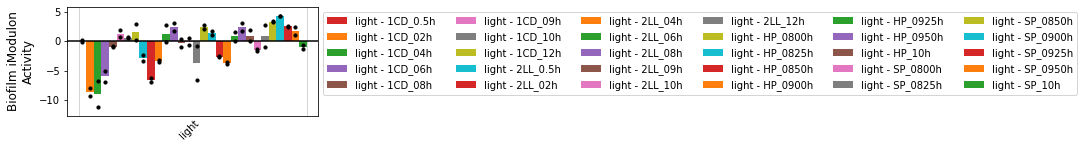

In [164]:
plot_activities(ica_data_prime,'Biofilm',projects= 'light', highlight= 'light')

<AxesSubplot:ylabel='IdiB iModulon\nActivity'>

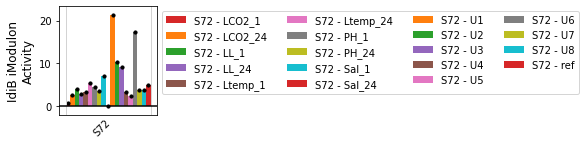

In [89]:
plot_activities(ica_data_prime,'IdiB',projects= 'S72', highlight= 'S72')

In [ ]:
plot_activities(ica_data_prime,5,projects= 'clock', highlight= 'clock')

In [ ]:
plot_activities(ica_data_prime,46,projects= 'H2O2', highlight= 'H2O2')

In [ ]:
plot_activities(ica_data_prime,5,projects= 'H2O2', highlight= 'H2O2')

In [ ]:
plot_activities(ica_data_prime,5,projects= 'rpaA',highlight= 'rpaA')

In [ ]:
plot_activities(ica_data_prime,1,projects= 'sigFctr')

In [ ]:
plot_activities(ica_data_prime,46,projects= 'ppGpp')

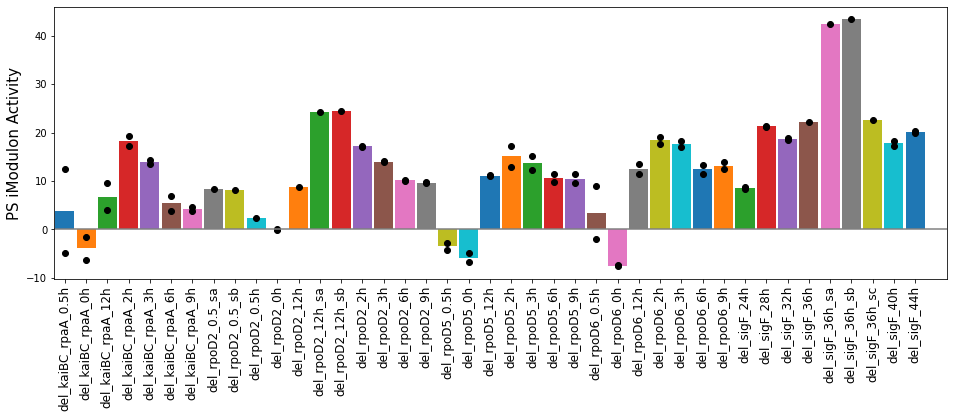

In [154]:
import matplotlib.pyplot as plt
#Put projects of interest here
#Put IMod whose activities you would like to look at here
imod = 'PS'
fig,ax = plt.subplots(figsize=[16,5])
seperators = []
dots = []
projects = ["sigFactor"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4","5","6","7","8","9","10","11","12", "13", "14", "15","16","17","18","19","20",
        "21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] == project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 41),xlabels,rotation=90,fontsize=12)
None

In [66]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig2/sigF.pdf', dpi=300, bbox_inches="tight")

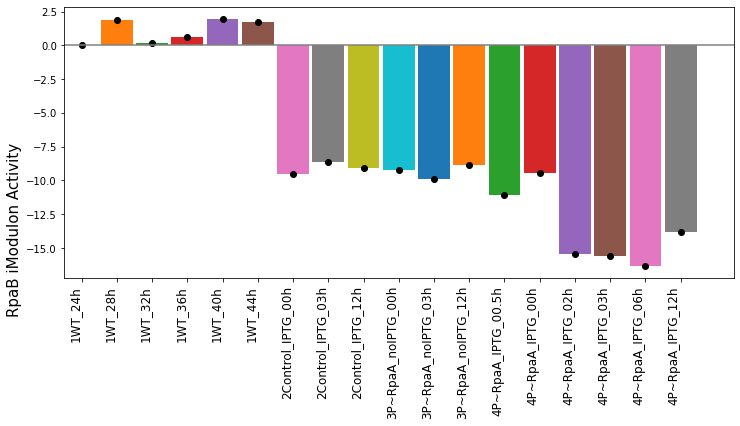

In [19]:
import matplotlib.pyplot as plt
#Put projects of interest here
#Put IMod whose activities you would like to look at here
imod = 'RpaB'
fig,ax = plt.subplots(figsize=[12,5])
seperators = []
dots = []
projects = ["clock"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4","5","6","7","8","9","10","11","12", "13", "14", "15","16","17","18"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] ==project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15, ha = 'right')
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 18),xlabels,rotation=90,fontsize=12,ha = 'right')
None

In [76]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig3/PhoSig_clock.pdf', dpi=300, bbox_inches="tight")

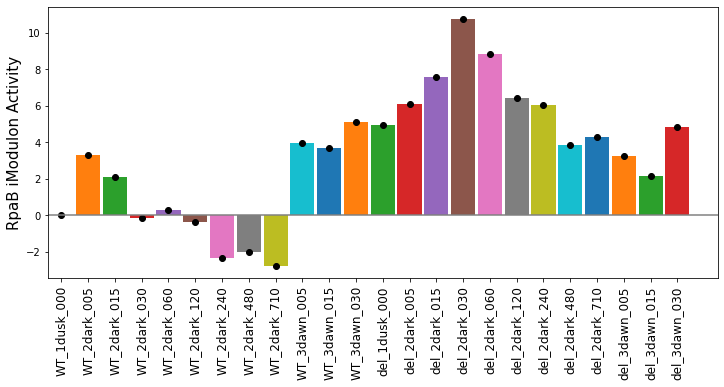

In [20]:
import matplotlib.pyplot as plt
#Put projects of interest here
#Put IMod whose activities you would like to look at here
imod = 'RpaB'
fig,ax = plt.subplots(figsize=[12,5])
seperators = []
dots = []
projects = ["rpaA"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4","5","6","7","8","9","10","11","12", "13", "14", "15","16","17","18","19","20",
        "21","22","23","24"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] ==project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()
# 

ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 24),xlabels,rotation=90,fontsize=12)
None

In [169]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig3/NC1_rpaA.pdf', dpi=300, bbox_inches="tight")

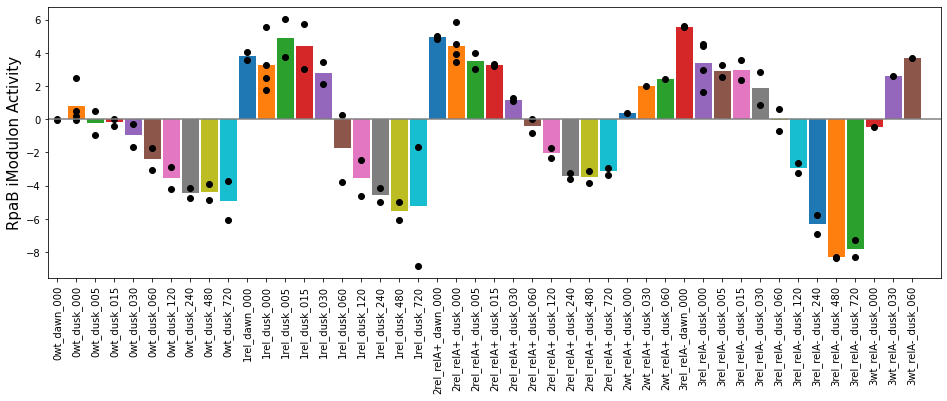

In [23]:
import matplotlib.pyplot as plt
#Put projects of interest here
#Put IMod whose activities you would like to look at here
imod = 'RpaB'
fig,ax = plt.subplots(figsize=[16,5])
seperators = []
dots = []
projects = ["ppGpp"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4","5","6","7","8","9","10","11","12", "13", "14", "15","16","17","18","19","20",
        "21","22","23","24","25","26","27","28","29","30","31","32","33","34","35","36","37","38","39","40","41",
        "42","43","44","45","46"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] == project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
for i in projects:
    non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
mean = non_mifH.mean()
std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 46),xlabels,rotation=90)
None

In [53]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig2/ppGpp.pdf', dpi=300, bbox_inches="tight")

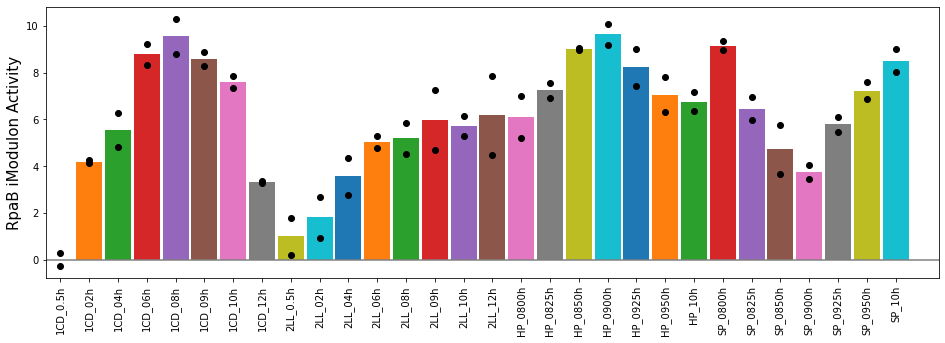

In [24]:
import matplotlib.pyplot as plt
#Put projects of interest here
#Put IMod whose activities you would like to look at here
imod = 'RpaB'
fig,ax = plt.subplots(figsize=[16,5])
seperators = []
dots = []
projects = ["light"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4","5","6","7","8","9","10","11","12", "13", "14", "15","16","17","18","19","20",
        "21","22","23","24","25","26","27","28","29","30"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] ==project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
# non_mifH = ica_data_prime.A.loc[imod]
# for i in projects:
#     non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
# mean = non_mifH.mean()
# std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
# ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
# ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 30),xlabels,rotation=90)
None

In [26]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig3/PhoSig_light.pdf', dpi=300, bbox_inches="tight")

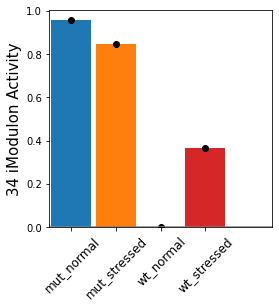

In [85]:
imod = 34
fig,ax = plt.subplots(figsize=[4,4])
seperators = []
dots = []
projects = ["H2O2"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] ==project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
# for i in projects:
#     non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
# mean = non_mifH.mean()
# std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 4),xlabels,rotation=45,fontsize=12)
None

In [84]:
fig.savefig('/home/tahani/Documents/elongatus/Figures/Fig2/idiB_H2O2.pdf', dpi=300, bbox_inches="tight")

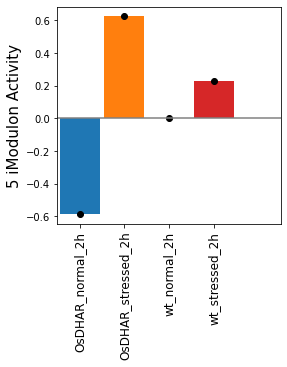

In [84]:
imod = 5
fig,ax = plt.subplots(figsize=[4,4])
seperators = []
dots = []
projects = ["GSH"]
# Put in labels of the conditions. You need one label for every condition in every project. The labels
# will be put in order from left to right. 
labels=["1","2","3","4"]
xlabels = []
label_count = 0

for project in projects:
    for i,j in ica_data_prime.sample_table.groupby(["project","condition"]):
        if i[0] ==project:
            dots.append(list(ica_data_prime.A[j.index].loc[imod]))
            ax.bar(labels[label_count],ica_data_prime.A[j.index].mean(axis=1)[imod],width=.9)
            label_count+=1
            xlabels.append(i[1])
            
sep_pos = -.5
dot_pos = 0
    
for condition in dots:
    for dot in condition:
        ax.plot(dot_pos,dot,"ko")
    dot_pos+=1
    
non_mifH = ica_data_prime.A.loc[imod]
# for i in projects:
#     non_mifH = non_mifH.drop(list(ica_data_prime.sample_table.loc[ica_data_prime.sample_table["project"]==i].index))
# mean = non_mifH.mean()
# std_dev = non_mifH.std()
# ax.errorbar(label_count,mean,yerr= std_dev, label="Other", color = "black",
#             marker=None ,capsize=10, capthick = 5,elinewidth=5)
ylimits = ax.get_ylim()
ax.set_xlim([-.5,label_count+.5])

ax.plot(list(ax.get_xlim()),[0,0],color="gray")
ax.set_ylim(ylimits)
ax.set_ylabel(str(imod)+" iModulon Activity",fontsize=15)
# This section controls how the seperators are put down. You count the number of samples in each project and 
# combine them in a array
# seperators = [5,3]
# #seperators.append(5)
# #seperators.append(3)
# for cord in seperators:
#     sep_pos+=cord
#     ax.plot([sep_pos,sep_pos],ylimits,color="gray")
    
# xlabels.append("Other ("+str(len(non_mifH))+")")
plt.xticks(np.arange(0, 4),xlabels,rotation="vertical",fontsize=12)
None

In [85]:
fig.savefig('IdiB_GSH.pdf', dpi=300, bbox_inches="tight")

In [ ]:
plot_activities(ica_data_prime,14,projects= 'ppGpp', highlight= 'ppGpp') 

In [ ]:
plot_activities(ica_data_prime,8,projects= 'clock_exp', highlight= 'clock_exp') 

In [ ]:
plot_activities(ica_data_prime,8,projects= 'sigFctr', highlight= 'sigFctr') 

## Figure 2 <a class="anchor" id="third-bullet"></a>

In [15]:
import seaborn as sns
from scipy.spatial import distance
from scipy.cluster import hierarchy
import matplotlib.patches as mpatches

In [16]:
plot_iModulons = pd.read_csv(join(data_dir,'plot3.csv'), index_col = 0)
cl = plot_iModulons['color']

In [17]:
#get activities for imodulons 
data = ica_data_prime.A.reindex(index = list(plot_iModulons.index))

## Figure 2 rpaA <a class="anchor" id="third-bullet"></a>

In [62]:
#take the activities from projects of interest 
samples_in_rpaA = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'rpaA'].index
df_final0 = data[samples_in_rpaA]
df_final0.head()

,SRX2356912,SRX2356913,SRX2356914,SRX2356915,SRX2356916,SRX2356917,SRX2356918,SRX2356919,SRX2356920,SRX2356921,...,SRX2356926,SRX2356927,SRX2356928,SRX2356929,SRX2356930,SRX2356931,SRX2356932,SRX2356933,SRX2356934,SRX2356935
Pho_starvation,-3.708020,-2.145147,-5.493149,-6.155627,-4.536300,-5.829069,-5.761979,-5.704410,-5.532737,0.0,...,-1.286168,-2.411601,-9.440992,-5.881463,-4.329373,-2.887411,-1.269456,0.972006,0.997506,5.520042
IdiB,2.831733,3.772498,3.601430,6.759967,7.597409,6.065255,7.064672,3.068565,5.371007,0.0,...,2.673574,3.986556,4.876339,7.553187,6.282898,4.753155,1.814281,-3.080066,1.078049,0.058854
RpaB,-3.957722,-0.653281,-1.868810,-4.097777,-3.689459,-4.305415,-6.314906,-5.983696,-6.738170,0.0,...,3.616941,6.803337,4.899979,2.473974,2.092348,-0.084446,0.326397,-0.685765,-1.786275,0.891069
CmpR,3.126484,4.324794,2.391613,5.274787,1.532677,2.495424,-0.009982,-0.823607,-1.997136,0.0,...,3.990302,1.766181,0.300967,2.960272,-0.337813,-3.426501,0.302477,-5.798972,7.367464,7.128065
Phototaxis_signaling,-3.862422,-3.591663,-13.566763,-13.464482,-11.344665,-9.060347,-6.348745,-9.955241,-8.921787,0.0,...,-6.114112,-13.468182,-22.526053,-22.402727,-19.456499,-20.253103,-17.083680,-3.344275,1.397592,2.324884


In [66]:
#take the activities from projects of interest 
condition = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'rpaA'].condition
df_final0 = df_final0.rename(columns=dict(zip(df_final0.columns,condition)))

In [67]:
colors = plot_iModulons.color
colors.index = df_final0.index
correlations = df_final0.T.corr()
corr_array = np.asarray(correlations)
method = 'weighted'

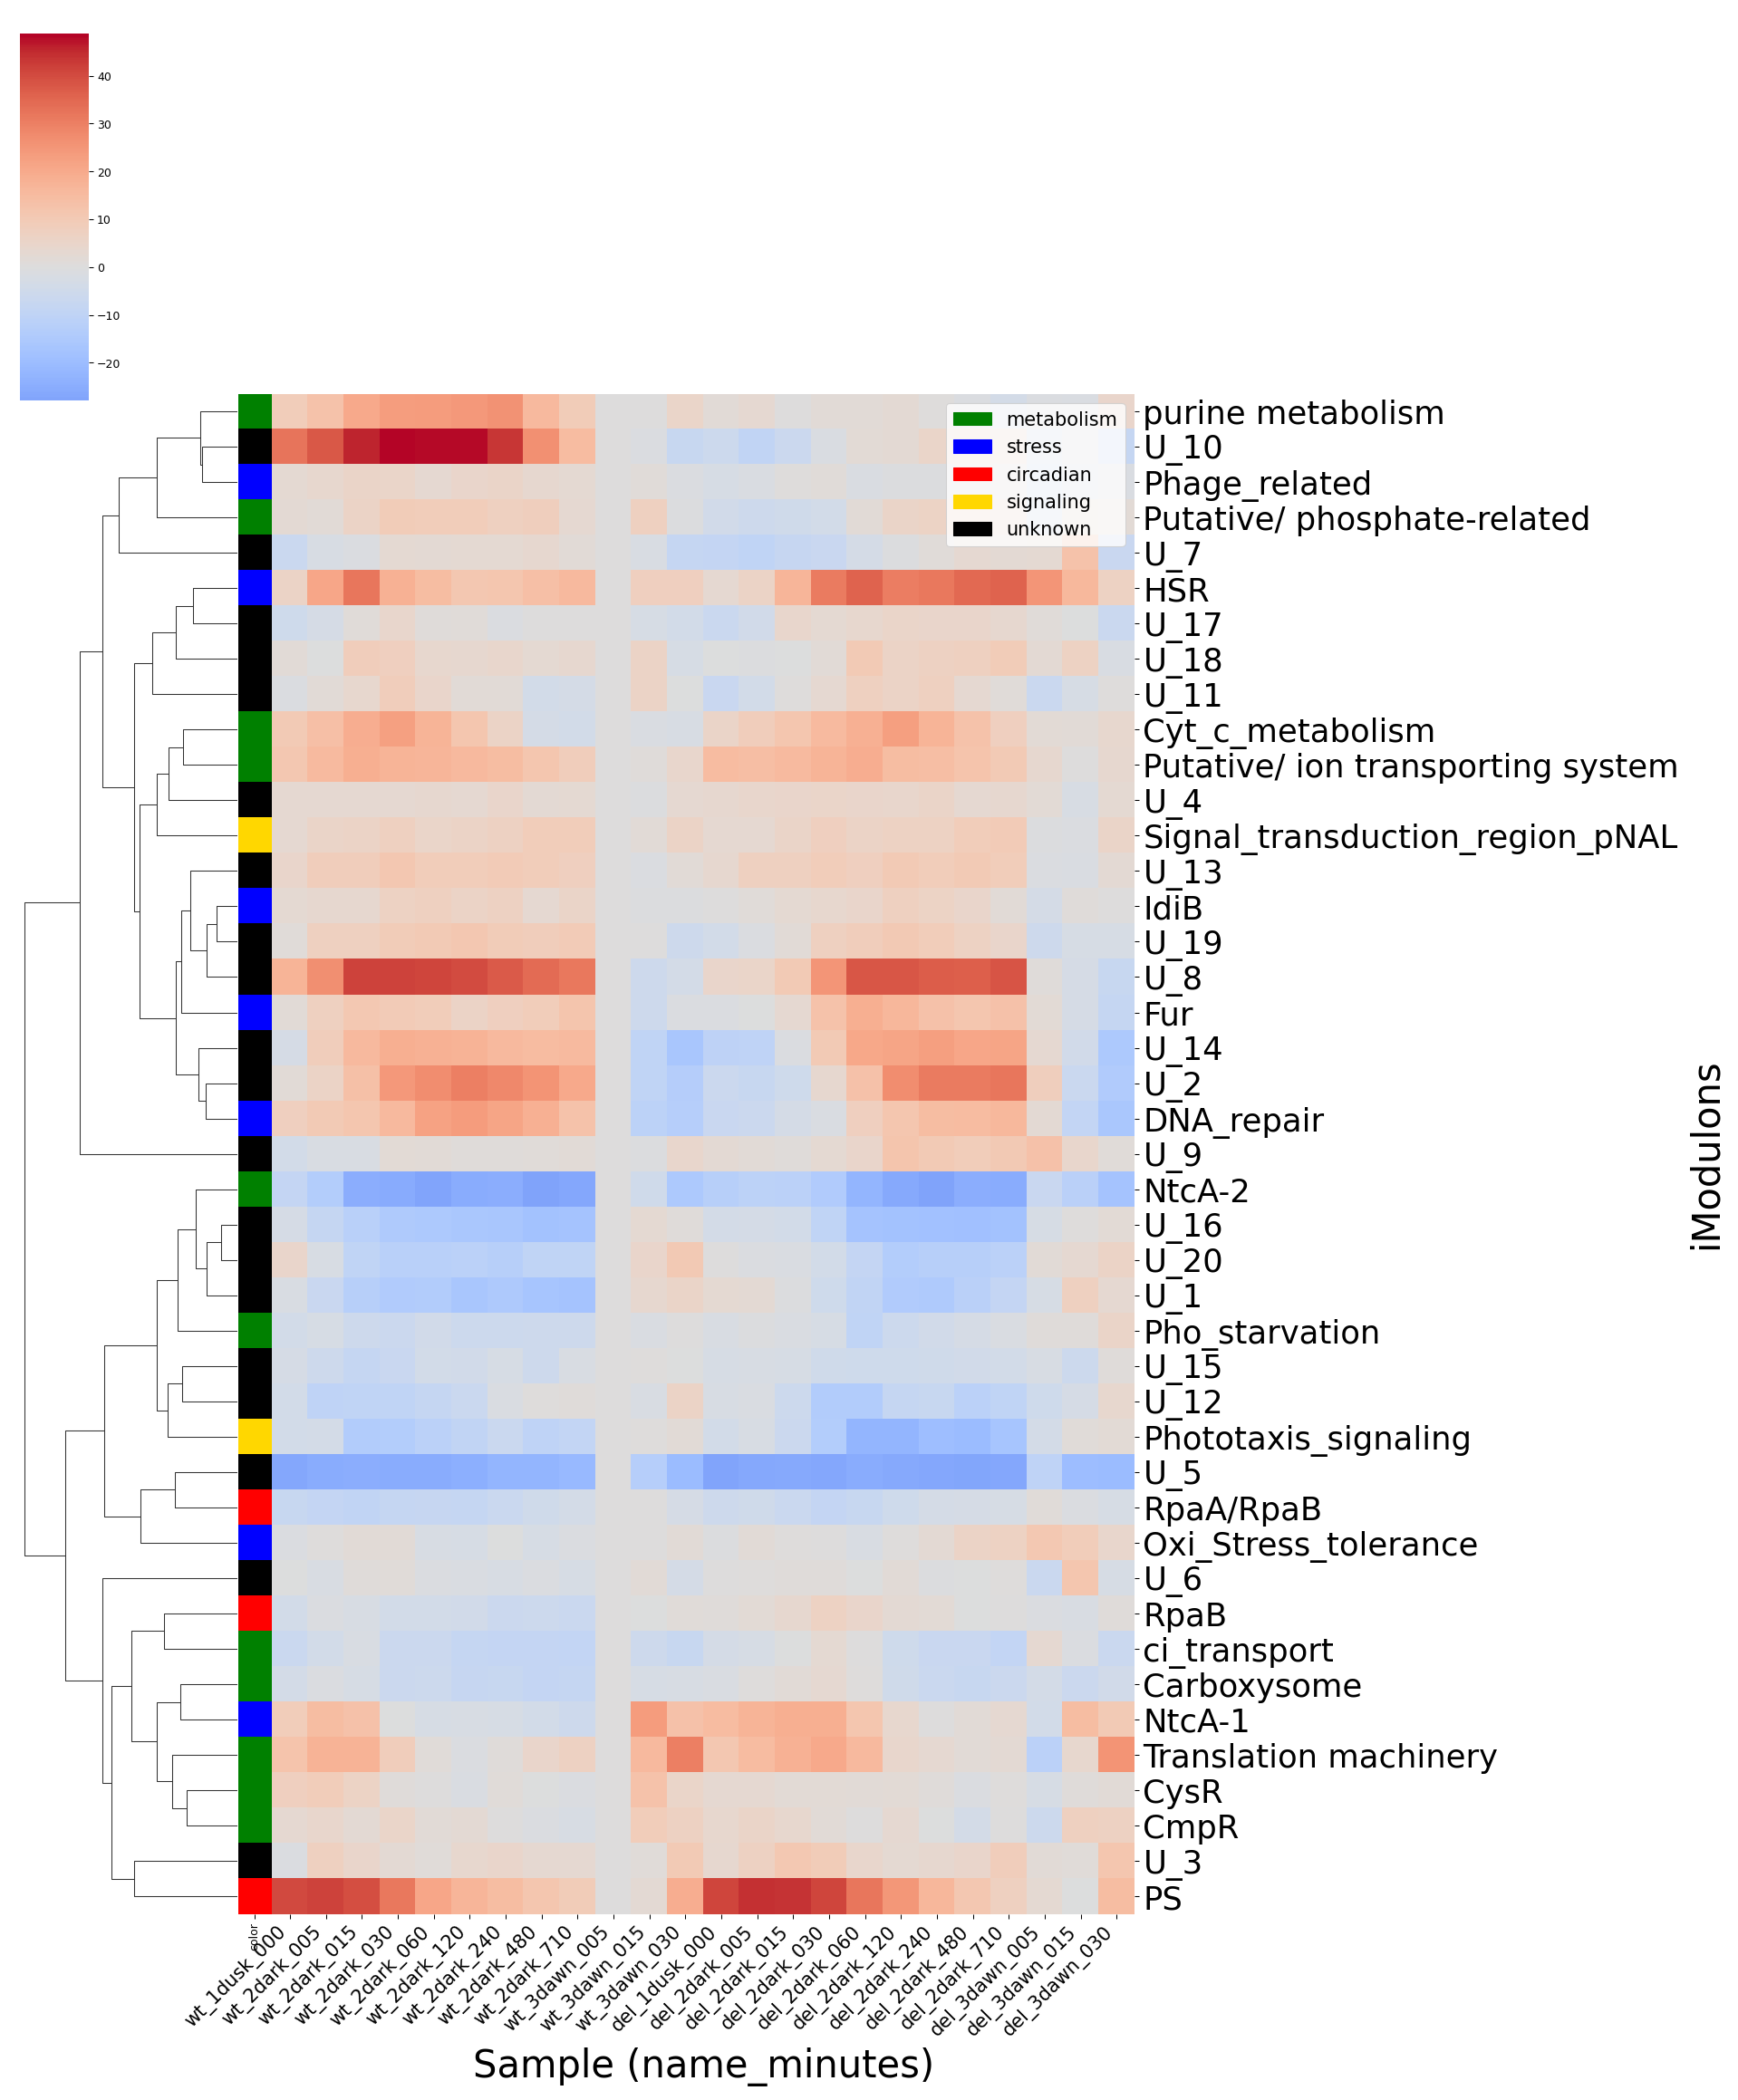

In [68]:
row_linkage = hierarchy.linkage(distance.pdist(corr_array), method = method,optimal_ordering = True)
width_half = 10

f = sns.clustermap(df_final0, figsize = (width_half, 1.5*width_half), row_linkage = row_linkage,
                   method = method,row_colors = colors,
                   col_cluster = False, cmap = 'coolwarm', center = 0)

f.ax_heatmap.set_xlabel('Sample (name_minutes)', fontsize = 20)
f.ax_heatmap.set_ylabel('iModulons', fontsize = 20)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 17)
# f.set_xticks(range(len(df))) # <--- set the ticks first
f.ax_heatmap.set_xticklabels(list(ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'rpaA'].condition),fontsize = 10,rotation= 45, ha ="right")

# f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
None
labels = ['metabolism', 'stress', 'circadian', 'signaling','unknown']
legend = [mpatches.Patch(color = c, label = l) for c, l in zip(cl.unique(), labels)]
f.ax_heatmap.legend(handles = legend, fontsize = 10)

In [251]:
f.savefig("RpaA_heatmap.pdf", transparent=True)

## Figure 2 ppGpp <a class="anchor" id="third-bullet"></a>

In [24]:
#take the activities from projects of interest 
data = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'ppGpp']
ppGpp_wt = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'ppGpp'].condition.str.startswith("0wt_", na = False)
ppGpp_rel = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'ppGpp'].condition.str.startswith("1rel_", na = False)
ppGpp_samples = (data[ppGpp_wt].index).append(data[ppGpp_rel].index)
ppGpp_conditions = list((data[ppGpp_wt].condition).append(data[ppGpp_rel].condition))

In [25]:
final_samples = ['1rel_dawn_000','1rel_dusk_005','1rel_dusk_030','1rel_dusk_120','1rel_dusk_480',
 '0wt_dawn_000','0wt_dusk_005','0wt_dusk_030','0wt_dusk_120','0wt_dusk_480',
 '1rel_dusk_000','1rel_dusk_015','1rel_dusk_060','1rel_dusk_240','1rel_dusk_720',
 '0wt_dusk_000','0wt_dusk_015','0wt_dusk_060', '0wt_dusk_240','0wt_dusk_720']

SRX_condition = dict(zip(ppGpp_samples,ppGpp_conditions))

In [26]:
dict(zip(ppGpp_samples,ppGpp_conditions))

{'SRX3159653': '0wt_dawn_000',
 'SRX3159654': '0wt_dawn_000',
 'SRX3159655': '0wt_dusk_000',
 'SRX3159656': '0wt_dusk_000',
 'SRX3176780': '0wt_dusk_000',
 'SRX3176781': '0wt_dusk_005',
 'SRX3176782': '0wt_dusk_015',
 'SRX3176783': '0wt_dusk_030',
 'SRX3176784': '0wt_dusk_060',
 'SRX3176785': '0wt_dusk_120',
 'SRX3176786': '0wt_dusk_240',
 'SRX3176787': '0wt_dusk_480',
 'SRX3176788': '0wt_dusk_720',
 'SRX3176798': '0wt_dusk_000',
 'SRX3176799': '0wt_dusk_005',
 'SRX3176800': '0wt_dusk_015',
 'SRX3176801': '0wt_dusk_030',
 'SRX3176802': '0wt_dusk_060',
 'SRX3176803': '0wt_dusk_120',
 'SRX3176804': '0wt_dusk_240',
 'SRX3176805': '0wt_dusk_480',
 'SRX3176806': '0wt_dusk_720',
 'SRX3159657': '1rel_dawn_000',
 'SRX3159658': '1rel_dawn_000',
 'SRX3159659': '1rel_dusk_000',
 'SRX3159660': '1rel_dusk_000',
 'SRX3176789': '1rel_dusk_000',
 'SRX3176790': '1rel_dusk_005',
 'SRX3176791': '1rel_dusk_015',
 'SRX3176792': '1rel_dusk_030',
 'SRX3176793': '1rel_dusk_060',
 'SRX3176794': '1rel_dusk_120'

In [27]:
data = ica_data_prime.A.reindex(index = list(plot_iModulons.index))
df = data[ppGpp_samples]
df = (df.rename(columns=dict(zip(ppGpp_samples,ppGpp_conditions)))).T
final_df = df.groupby(by=df.index).mean()
final_df = final_df.T
final_df

,0wt_dawn_000,0wt_dusk_000,0wt_dusk_005,0wt_dusk_015,0wt_dusk_030,0wt_dusk_060,0wt_dusk_120,0wt_dusk_240,0wt_dusk_480,0wt_dusk_720,1rel_dawn_000,1rel_dusk_000,1rel_dusk_005,1rel_dusk_015,1rel_dusk_030,1rel_dusk_060,1rel_dusk_120,1rel_dusk_240,1rel_dusk_480,1rel_dusk_720
Pho_starvation,-1.387779e-16,3.375430,3.421232,1.244201,-0.390497,0.558604,1.731106,2.323625,-1.553760,-2.473577,-2.573335,-4.996129,-7.143198,-5.670270,-4.485233,6.243588,6.499556,8.568009,9.901280,17.145502
IdiB,-9.714451e-16,-0.410178,3.189873,2.711320,2.454788,2.106332,2.127457,1.480024,-0.233592,0.885408,-4.477183,-4.372588,-4.347384,-3.517540,-3.742175,1.879165,2.234807,2.148161,2.476427,7.019197
RpaB,5.551115e-17,0.778076,-0.215663,-0.179801,-0.971137,-2.386394,-3.554698,-4.430992,-4.383416,-4.910980,3.810422,3.254166,4.911460,4.385934,2.785862,-1.760813,-3.544074,-4.548458,-5.526028,-5.241951
CmpR,1.665335e-16,3.078596,5.601780,2.463794,-1.316237,-5.985111,-6.384589,-7.055270,-11.211880,-9.531122,-0.472338,-0.710311,0.943023,-0.400109,-3.971142,-2.859754,-2.775678,-2.208306,-2.819091,2.722998
Phototaxis_signaling,3.989864e-17,0.884247,-1.830032,-8.571500,-11.455444,-10.133260,-7.757273,-8.683113,-11.379939,-11.233343,1.465498,0.840972,-0.362467,-2.758034,-6.128026,-1.993771,-2.236480,-1.753152,-3.699626,2.881573
Phage_related,5.551115e-17,1.304966,2.396879,3.060863,2.875762,4.181065,3.016855,3.855431,2.931299,2.523257,-7.339262,-1.108748,4.869007,4.485810,3.744472,0.203071,0.983474,2.121307,3.517681,5.977045
CysR,3.053113e-16,-2.026786,-6.137654,-9.170009,-11.481209,-12.361956,-11.937545,-12.010479,-14.481459,-14.608655,-7.909895,-9.226798,-12.889548,-14.552790,-14.995026,-13.156918,-12.040495,-11.884979,-12.679346,-10.490476
Putative/ ion transporting system,-6.522560e-16,1.222803,2.614444,4.207143,5.789209,6.984395,7.314522,4.988684,2.195330,0.514769,-3.040665,3.516884,6.091591,5.838470,6.193412,7.803741,6.393002,4.980161,2.996067,3.487693
Translation machinery,-4.996004e-16,-3.186236,-0.018445,-1.437421,-7.521953,-11.912573,-11.508692,-10.076238,-5.770385,-7.632173,1.252301,2.262377,6.719584,5.733316,2.532701,-12.602207,-15.589966,-16.909304,-18.839752,-33.237340
Putative/ phosphate-related,1.249001e-16,1.719196,1.460400,3.894831,5.977291,7.717677,7.649171,6.173057,5.172947,6.804906,0.492140,0.715703,1.522848,2.420955,2.828651,4.137050,5.175017,5.467147,3.191537,6.055116


In [28]:
correlations = final_df.T.corr()
corr_array = np.asarray(correlations)
method = 'weighted'

In [29]:
row_linkage = hierarchy.linkage(distance.pdist(corr_array), method = method,optimal_ordering = True)
width_half = 10
# colors = plot_iModulons.color
# colors.index = plot_iModulons.index

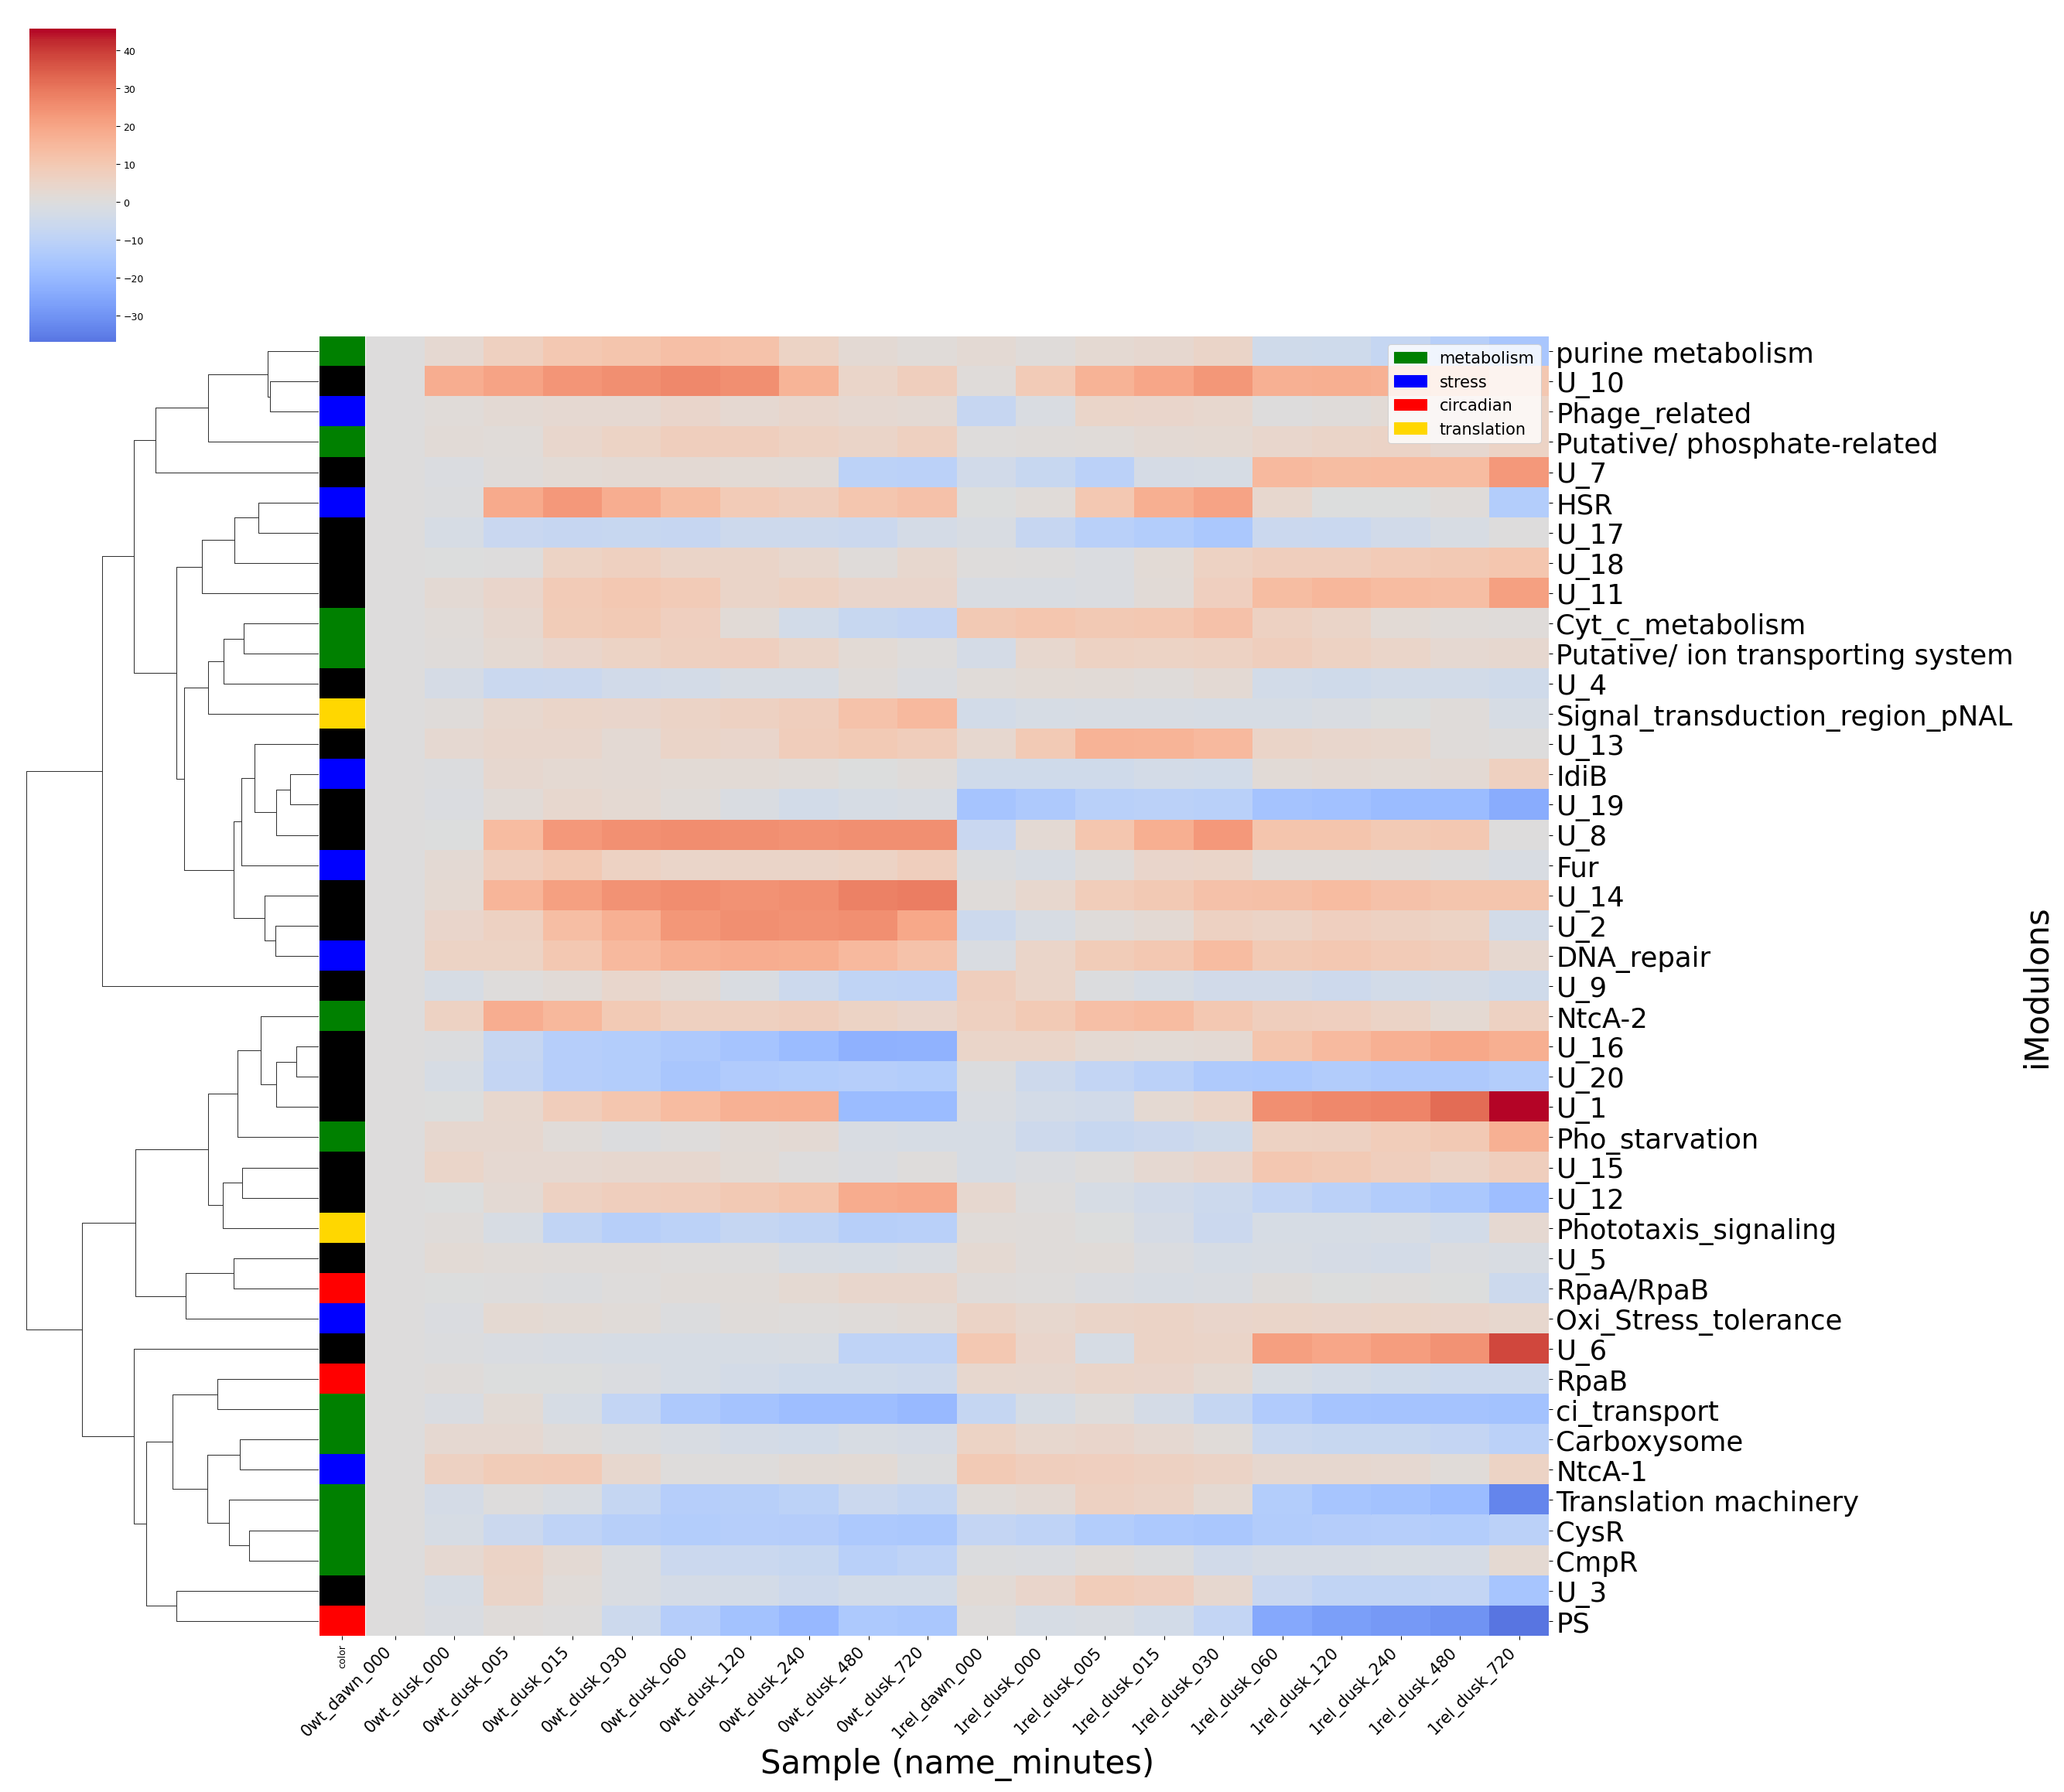

In [87]:
f = sns.clustermap(final_df, figsize = (width_half,width_half), row_linkage = row_linkage,
                   method = method,row_colors = colors,
                   col_cluster = False, cmap = 'coolwarm', center = 0)

f.ax_heatmap.set_xlabel('Sample (name_minutes)', fontsize = 20)
f.ax_heatmap.set_ylabel('iModulons', fontsize = 20)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 17)
f.ax_heatmap.set_xticklabels(final_df.columns,fontsize = 10,rotation= 45, ha ="right")

# f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
None
labels = ['metabolism', 'stress', 'circadian', 'translation']
legend = [mpatches.Patch(color = c, label = l) for c, l in zip(cl.unique(), labels)]
f.ax_heatmap.legend(handles = legend, fontsize = 10)

In [31]:
f.savefig("ppGpp_heatmap.pdf", transparent=True)

## Figure 2 light <a class="anchor" id="third-bullet"></a>

In [32]:
#take the activities from projects of interest 
data = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'light']
samples = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'light'].index
condition_LL = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'light'].condition.str.startswith("LL_", na = False)
condition_CD = ica_data_prime.sample_table[ica_data_prime.sample_table.project == 'light'].condition.str.startswith("CD_", na = False)

light_samples = (data[condition_LL].index).append(data[condition_CD].index)
light_conditions = list((data[condition_LL].condition).append(data[condition_CD].condition))

In [33]:
SRX_condition = dict(zip(light_samples,light_conditions))
SRX_condition

{'SRX3211304': 'LL_dawn_0.5h',
 'SRX3211305': 'LL_dawn_0.5h',
 'SRX3211306': 'LL_dawn_02h',
 'SRX3211307': 'LL_dawn_02h',
 'SRX3211308': 'LL_dawn_04h',
 'SRX3211309': 'LL_dawn_04h',
 'SRX3211310': 'LL_dawn_06h',
 'SRX3211311': 'LL_dawn_06h',
 'SRX3211312': 'LL_dawn_08h',
 'SRX3211313': 'LL_dawn_08h',
 'SRX3211314': 'LL_dawn_09h',
 'SRX3211315': 'LL_dawn_09h',
 'SRX3211316': 'LL_dawn_10h',
 'SRX3211317': 'LL_dawn_10h',
 'SRX3211318': 'LL_dawn_12h',
 'SRX3211319': 'LL_dawn_12h',
 'SRX3211320': 'CD_dawn_0.5h',
 'SRX3211321': 'CD_dawn_0.5h',
 'SRX3211322': 'CD_dawn_02h',
 'SRX3211323': 'CD_dawn_02h',
 'SRX3211324': 'CD_dawn_04h',
 'SRX3211325': 'CD_dawn_04h',
 'SRX3211326': 'CD_dawn_06h',
 'SRX3211327': 'CD_dawn_06h',
 'SRX3211328': 'CD_dawn_08h',
 'SRX3211329': 'CD_dawn_08h',
 'SRX3211330': 'CD_dawn_09h',
 'SRX3211331': 'CD_dawn_09h',
 'SRX3211332': 'CD_dawn_10h',
 'SRX3211333': 'CD_dawn_10h',
 'SRX3211334': 'CD_dawn_12h',
 'SRX3211335': 'CD_dawn_12h'}

In [34]:
data = ica_data_prime.A.reindex(index = list(plot_iModulons.index))
df = data[light_samples]
df = (df.rename(columns=SRX_condition)).T
final_df2 = df.groupby(by=df.index).mean()
final_df2 = final_df2.T
final_df2

,CD_dawn_0.5h,CD_dawn_02h,CD_dawn_04h,CD_dawn_06h,CD_dawn_08h,CD_dawn_09h,CD_dawn_10h,CD_dawn_12h,LL_dawn_0.5h,LL_dawn_02h,LL_dawn_04h,LL_dawn_06h,LL_dawn_08h,LL_dawn_09h,LL_dawn_10h,LL_dawn_12h
Pho_starvation,5.551115e-16,-4.407135,-4.206842,-5.253747,-5.835775,-5.648639,-5.440502,-5.426138,1.546522,-4.121283,-3.378929,-5.103102,-4.692717,-3.823243,-3.841933,-4.163963
IdiB,-2.220446e-16,-10.436953,-13.165179,-12.620461,-13.021850,-12.165319,-12.909668,-5.829313,-2.324685,-10.758744,-12.079080,-10.292135,-10.506950,-9.275629,-8.484754,-9.356122
RpaB,2.775558e-17,4.181371,5.535366,8.784311,9.545751,8.590698,7.600697,3.315372,0.997317,1.810790,3.558536,5.022960,5.192641,5.975058,5.702756,6.167367
CmpR,1.110223e-16,-4.845234,-4.159507,-4.051822,-3.541744,-4.175646,-5.434366,-6.356463,-0.766066,-4.831375,-1.753830,-2.431327,-4.292142,-4.658709,-4.108573,-4.699071
Phototaxis_signaling,-4.440892e-16,-0.035487,3.715029,4.729939,3.181198,3.029056,3.152751,-1.567521,6.165730,-3.818798,2.843378,5.182865,5.697604,5.173099,5.839446,7.433523
Phage_related,1.110223e-15,-1.543146,3.638866,1.874272,1.465780,0.529948,-0.003196,2.527572,-1.560280,-2.045342,-0.696507,-0.615925,-1.040649,-1.979316,-1.357572,-0.697131
CysR,-1.110223e-15,1.477234,-0.264186,0.110099,-2.168083,-2.338493,-2.406661,-4.040550,-0.965297,-1.261932,-0.660172,0.343738,1.533333,-1.240036,-1.560221,-1.634039
Putative/ ion transporting system,0.000000e+00,0.471427,-2.255117,1.375982,-0.405692,3.381976,3.876453,4.066401,-2.368136,-1.149958,1.382380,1.132418,1.240226,0.307706,0.360652,-0.654366
Translation machinery,6.661338e-16,15.556184,9.873768,8.666186,0.913672,-1.469944,-0.401659,-6.727728,11.027852,7.114382,-2.228735,-4.461368,-2.015826,2.215963,3.896102,4.293746
Putative/ phosphate-related,8.326673e-17,-8.582535,-8.885260,-5.962299,-0.930310,1.311539,0.589389,1.550608,-2.858437,-6.526524,-3.275896,1.305387,2.414856,-0.293928,-0.040960,-3.674114


In [35]:
correlations = final_df2.T.corr()
corr_array = np.asarray(correlations)
method = 'weighted'

In [36]:
row_linkage = hierarchy.linkage(distance.pdist(corr_array), method = method,optimal_ordering = True)
width_half = 10
# colors = plot_iModulons.color
# colors.index = plot_iModulons.index

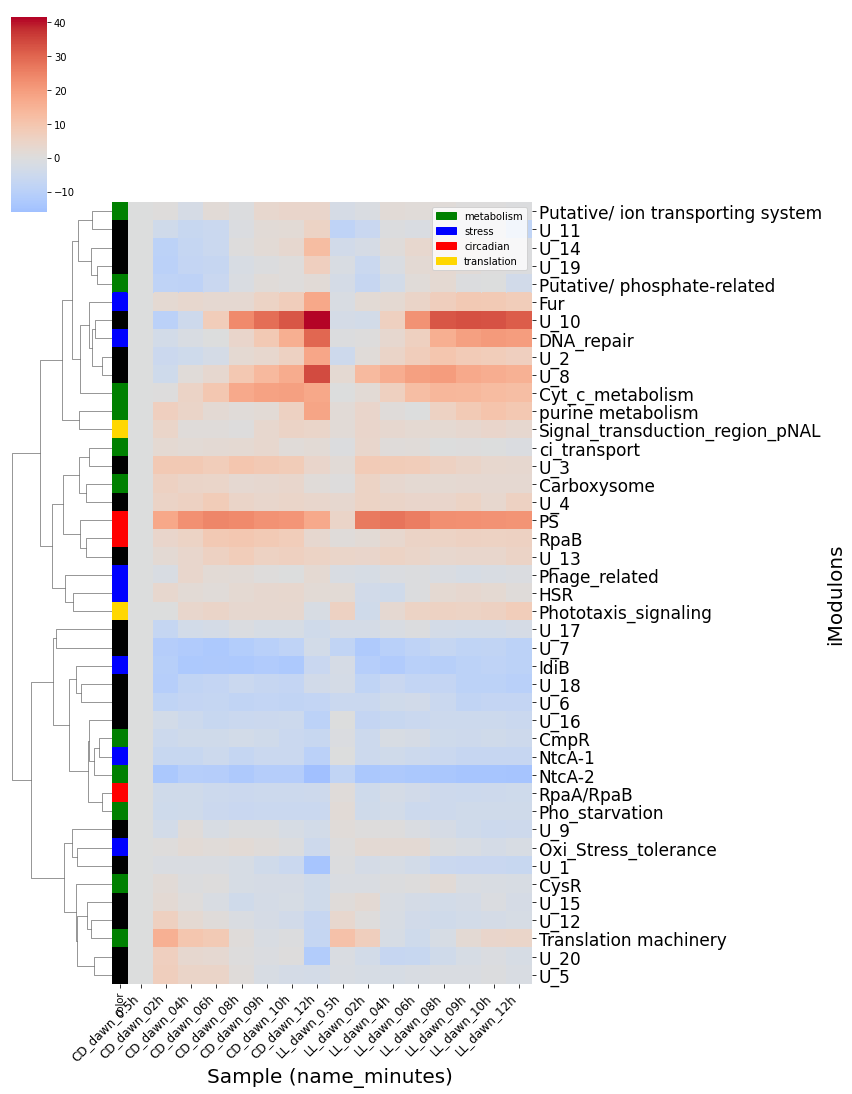

In [37]:
f = sns.clustermap(final_df2, figsize = (width_half, 1.5*width_half), row_linkage = row_linkage,
                   method = method,row_colors = colors,
                   col_cluster = False, cmap = 'coolwarm', center = 0)

f.ax_heatmap.set_xlabel('Sample (name_minutes)', fontsize = 20)
f.ax_heatmap.set_ylabel('iModulons', fontsize = 20)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 17)
f.ax_heatmap.set_xticklabels(final_df2.columns,fontsize = 12,rotation= 45, ha ="right")

# f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
None
labels = ['metabolism', 'stress', 'circadian', 'translation']
legend = [mpatches.Patch(color = c, label = l) for c, l in zip(cl.unique(), labels)]
f.ax_heatmap.legend(handles = legend, fontsize = 10)

In [69]:
FINAL1 = pd.concat([df_final0,final_df.reindex(df_final0.index)], axis=1)
FINAL2 = pd.concat([FINAL1,final_df2.reindex(FINAL1.index)], axis=1)
FINAL2

,wt_1dusk_000,wt_2dark_005,wt_2dark_015,wt_2dark_030,wt_2dark_060,wt_2dark_120,wt_2dark_240,wt_2dark_480,wt_2dark_710,wt_3dawn_005,...,CD_dawn_10h,CD_dawn_12h,LL_dawn_0.5h,LL_dawn_02h,LL_dawn_04h,LL_dawn_06h,LL_dawn_08h,LL_dawn_09h,LL_dawn_10h,LL_dawn_12h
Pho_starvation,-3.708020,-2.145147,-5.493149,-6.155627,-4.536300,-5.829069,-5.761979,-5.704410,-5.532737,0.0,...,-5.440502,-5.426138,1.546522,-4.121283,-3.378929,-5.103102,-4.692717,-3.823243,-3.841933,-4.163963
IdiB,2.831733,3.772498,3.601430,6.759967,7.597409,6.065255,7.064672,3.068565,5.371007,0.0,...,-12.909668,-5.829313,-2.324685,-10.758744,-12.079080,-10.292135,-10.506950,-9.275629,-8.484754,-9.356122
RpaB,-3.957722,-0.653281,-1.868810,-4.097777,-3.689459,-4.305415,-6.314906,-5.983696,-6.738170,0.0,...,7.600697,3.315372,0.997317,1.810790,3.558536,5.022960,5.192641,5.975058,5.702756,6.167367
CmpR,3.126484,4.324794,2.391613,5.274787,1.532677,2.495424,-0.009982,-0.823607,-1.997136,0.0,...,-5.434366,-6.356463,-0.766066,-4.831375,-1.753830,-2.431327,-4.292142,-4.658709,-4.108573,-4.699071
Phototaxis_signaling,-3.862422,-3.591663,-13.566763,-13.464482,-11.344665,-9.060347,-6.348745,-9.955241,-8.921787,0.0,...,3.152751,-1.567521,6.165730,-3.818798,2.843378,5.182865,5.697604,5.173099,5.839446,7.433523
Phage_related,2.715371,4.097880,5.522992,5.078884,2.971605,4.659678,5.427890,3.823291,2.854122,0.0,...,-0.003196,2.527572,-1.560280,-2.045342,-0.696507,-0.615925,-1.040649,-1.979316,-1.357572,-0.697131
CysR,7.793312,9.194040,6.416238,0.976260,0.224477,-1.245381,1.220434,-0.109744,-1.116348,0.0,...,-2.406661,-4.040550,-0.965297,-1.261932,-0.660172,0.343738,1.533333,-1.240036,-1.560221,-1.634039
Putative/ ion transporting system,11.339652,15.330189,18.570142,17.452144,16.781542,15.583953,14.544369,11.646236,8.618917,0.0,...,3.876453,4.066401,-2.368136,-1.149958,1.382380,1.132418,1.240226,0.307706,0.360652,-0.654366
Translation machinery,12.468429,17.718246,17.671967,8.499549,1.428025,-0.767874,1.030461,4.498635,7.059158,0.0,...,-0.401659,-6.727728,11.027852,7.114382,-2.228735,-4.461368,-2.015826,2.215963,3.896102,4.293746
Putative/ phosphate-related,2.422347,2.045150,6.017259,9.365342,9.180411,8.825204,7.730940,8.047467,3.311883,0.0,...,0.589389,1.550608,-2.858437,-6.526524,-3.275896,1.305387,2.414856,-0.293928,-0.040960,-3.674114


In [97]:
row_linkage = hierarchy.linkage(distance.pdist(corr_array), method = method,optimal_ordering = True)
width_half = 30

In [ ]:
f = sns.clustermap(FINAL2, figsize = (width_half*1.5, width_half),
                   method = method,row_colors = colors,
                   col_cluster = False, cmap = 'bwr', center = 0)

f.ax_heatmap.set_xlabel('Sample (name_minutes)', fontsize = 20)
f.ax_heatmap.set_ylabel('iModulons', fontsize = 20)
f.ax_heatmap.set_yticklabels(f.ax_heatmap.get_ymajorticklabels(), fontsize = 30)
f.ax_heatmap.set_xticklabels(FINAL2.columns,fontsize = 30,rotation= 45, ha ="right")

# f.ax_heatmap.set_xticklabels(f.ax_heatmap.get_xmajorticklabels(), fontsize = 10)
None
labels = ['metabolism', 'stress', 'circadian', 'translation']
legend = [mpatches.Patch(color = c, label = l) for c, l in zip(cl.unique(), labels)]

f.ax_heatmap.legend(handles = legend, fontsize = 10, loc = (1,1))

In [104]:
f.savefig("heatmap_bwr.pdf", transparent=True)

# Final Figure

In [290]:
len(FINAL2.columns)

60

In [61]:
FINAL2

,SRX2356912,SRX2356913,SRX2356914,SRX2356915,SRX2356916,SRX2356917,SRX2356918,SRX2356919,SRX2356920,SRX2356921,...,CD_dawn_10h,CD_dawn_12h,LL_dawn_0.5h,LL_dawn_02h,LL_dawn_04h,LL_dawn_06h,LL_dawn_08h,LL_dawn_09h,LL_dawn_10h,LL_dawn_12h
Pho_starvation,-3.708020,-2.145147,-5.493149,-6.155627,-4.536300,-5.829069,-5.761979,-5.704410,-5.532737,0.0,...,-5.440502,-5.426138,1.546522,-4.121283,-3.378929,-5.103102,-4.692717,-3.823243,-3.841933,-4.163963
IdiB,2.831733,3.772498,3.601430,6.759967,7.597409,6.065255,7.064672,3.068565,5.371007,0.0,...,-12.909668,-5.829313,-2.324685,-10.758744,-12.079080,-10.292135,-10.506950,-9.275629,-8.484754,-9.356122
RpaB,-3.957722,-0.653281,-1.868810,-4.097777,-3.689459,-4.305415,-6.314906,-5.983696,-6.738170,0.0,...,7.600697,3.315372,0.997317,1.810790,3.558536,5.022960,5.192641,5.975058,5.702756,6.167367
CmpR,3.126484,4.324794,2.391613,5.274787,1.532677,2.495424,-0.009982,-0.823607,-1.997136,0.0,...,-5.434366,-6.356463,-0.766066,-4.831375,-1.753830,-2.431327,-4.292142,-4.658709,-4.108573,-4.699071
Phototaxis_signaling,-3.862422,-3.591663,-13.566763,-13.464482,-11.344665,-9.060347,-6.348745,-9.955241,-8.921787,0.0,...,3.152751,-1.567521,6.165730,-3.818798,2.843378,5.182865,5.697604,5.173099,5.839446,7.433523
Phage_related,2.715371,4.097880,5.522992,5.078884,2.971605,4.659678,5.427890,3.823291,2.854122,0.0,...,-0.003196,2.527572,-1.560280,-2.045342,-0.696507,-0.615925,-1.040649,-1.979316,-1.357572,-0.697131
CysR,7.793312,9.194040,6.416238,0.976260,0.224477,-1.245381,1.220434,-0.109744,-1.116348,0.0,...,-2.406661,-4.040550,-0.965297,-1.261932,-0.660172,0.343738,1.533333,-1.240036,-1.560221,-1.634039
Putative/ ion transporting system,11.339652,15.330189,18.570142,17.452144,16.781542,15.583953,14.544369,11.646236,8.618917,0.0,...,3.876453,4.066401,-2.368136,-1.149958,1.382380,1.132418,1.240226,0.307706,0.360652,-0.654366
Translation machinery,12.468429,17.718246,17.671967,8.499549,1.428025,-0.767874,1.030461,4.498635,7.059158,0.0,...,-0.401659,-6.727728,11.027852,7.114382,-2.228735,-4.461368,-2.015826,2.215963,3.896102,4.293746
Putative/ phosphate-related,2.422347,2.045150,6.017259,9.365342,9.180411,8.825204,7.730940,8.047467,3.311883,0.0,...,0.589389,1.550608,-2.858437,-6.526524,-3.275896,1.305387,2.414856,-0.293928,-0.040960,-3.674114


<AxesSubplot:xlabel='rpaA:WT_2dark_240', ylabel='rpaA:del_2dark_240'>

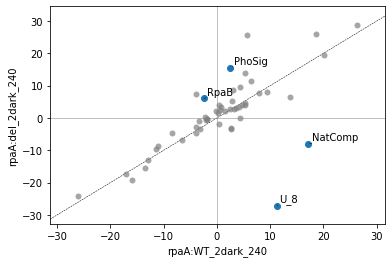

In [113]:
plot_dima(ica_data_prime, 'rpaA:WT_2dark_240','rpaA:del_2dark_240')

<AxesSubplot:xlabel='rpaA:WT_2dark_015', ylabel='rpaA:del_2dark_015'>

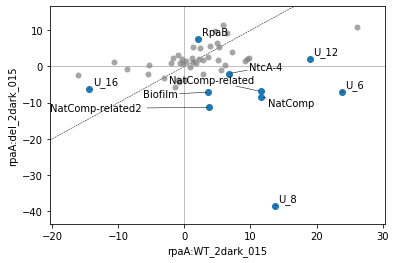

In [117]:
plot_dima(ica_data_prime, 'rpaA:WT_2dark_015','rpaA:del_2dark_015')

<AxesSubplot:xlabel='rpaA:WT_2dark_060', ylabel='rpaA:del_2dark_060'>

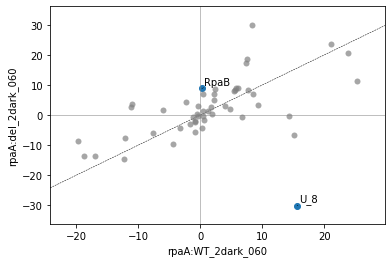

In [118]:
plot_dima(ica_data_prime, 'rpaA:WT_2dark_060','rpaA:del_2dark_060')

<AxesSubplot:xlabel='S72:U8', ylabel='S72:U1'>

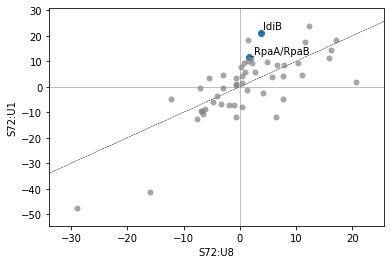

In [125]:
plot_dima(ica_data_prime, 'S72:U8','S72:U1')

<AxesSubplot:xlabel='light:SP_0900h', ylabel='light:HP_0900h'>

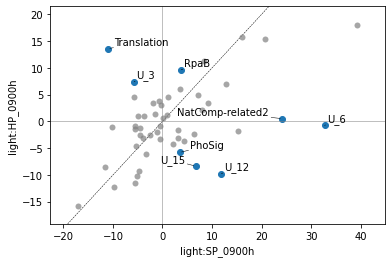

In [127]:
plot_dima(ica_data_prime, 'light:SP_0900h','light:HP_0900h')

<AxesSubplot:xlabel='H2O2:wt_normal', ylabel='H2O2:mut_normal'>

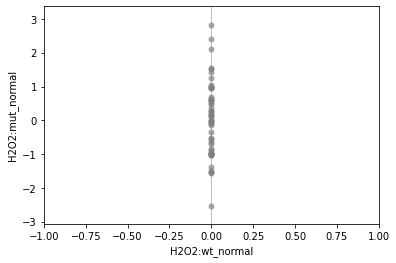

In [134]:
plot_dima(ica_data_prime, 'H2O2:wt_normal','H2O2:mut_normal')

([], [])

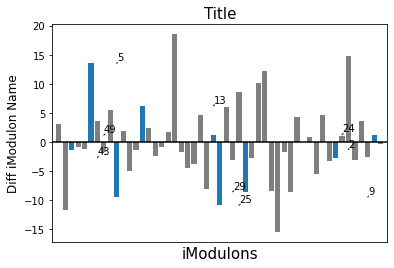

In [140]:
from adjustText import adjust_text
from pymodulon.util import dima
base_condition = 'light:SP_0900h'
diff_condition = 'light:HP_0900h'
threshold = 3
table = dima(ica_data,base_condition,diff_condition,threshold=threshold)
fig,ax = plt.subplots()
dima_samples = ica_data.sample_table.loc[ica_data.sample_table["full_name"]==diff_condition].index
activity_data = (ica_data.A[dima_samples].mean(axis=1)).sort_values()
labels=[]
width = 0
# You can use this section to control which labels you want to display. Just add an additional if/else statement
# to filter out any labels that don't meet a certain criteria (Ex. Only put labels on activity greater than 10,
# but still color all points with activity greater than 5)
for i in range(0,51):
    if activity_data.index[i] in table.index:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:blue")
        labels.append(ax.text(width, activity_data[i],activity_data.index[i]))
    else:
        ax.bar(activity_data.index[i],activity_data[i],color="tab:gray")
    width+=1
adjust_text(labels,ax=ax,arrowprops=dict(arrowstyle="-",color="k",lw=1),
            only_move={"objects": "y"})
ax.plot([-1,51],[0,0],color="black")
ax.set_xlim([-1,51])
ax.set_xlabel("iModulons",fontsize=15)
ax.set_ylabel("Diff iModulon Name",fontsize=12)
ax.set_title("Title",fontsize=15)
    
plt.xticks([])